# EDA: Diagnosing Diabetes

In this project, you'll imagine you are a data scientist interested in exploring data that looks at how certain diagnostic factors affect the diabetes outcome of women patients.

You will use your EDA skills to help inspect, clean, and validate the data.

**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)

Let's get started!

## Initial Inspection

1. First, familiarize yourself with the dataset [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

   Look at each of the nine columns in the documentation.
   
   What do you expect each data type to be?

Expected data type for each column:

- `Pregnancies`: 
- `Glucose`: 
- `BloodPressure`: 
- `SkinThickness`: 
- `Insulin`: 
- `BMI`: 
- `DiabetesPedigreeFunction`: 
- `Age`: 
- `Outcome`: 

2. Next, let's load in the diabetes data to start exploring.

   Load the data in a variable called `diabetes_data` and print the first few rows.
   
   **Note**: The data is stored in a file called `diabetes.csv`.

In [1]:
import cudf.pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cudf.pandas.install()

import pandas as pd  # noqa

pd.set_option("display.max_colwidth", None)

In [2]:
# load in data
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3. How many columns (features) does the data contain?

In [3]:
# print number of columns
len(diabetes_data.columns)

9

4. How many rows (observations) does the data contain?

In [4]:
# print number of rows
len(diabetes_data)

768

## Further Inspection

5. Let's inspect `diabetes_data` further.

   Do any of the columns in the data contain null (missing) values?

In [5]:
# find whether columns contain null values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

6. If you answered no to the question above, not so fast!

   While it's technically true that none of the columns contain null values, that doesn't necessarily mean that the data isn't missing any values.
   
   When exploring data, you should always question your assumptions and try to dig deeper.
   
   To investigate further, calculate summary statistics on `diabetes_data` using the `.describe()` method.

In [6]:
# perform summary statistics
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


7. Looking at the summary statistics, do you notice anything odd about the following columns?

   - `Glucose`
   - `BloodPressure`
   - `SkinThickness`
   - `Insulin`
   - `BMI`

**Your response to question 7**:

There seem to be clear outliers in most of these properties (insulin or BMI are quite extreme in that regard). The distibutions look to be skewed to the right also, checking the inter-quartiles and std deviations.
I would qualify them as "odd" though.
-> but the 0 values may indicate missing data indeed (had this information from the official solution)

8. Do you spot any other outliers in the data?

**Your response to question 8**:

9. Let's see if we can get a more accurate view of the missing values in the data.

   Use the following code to replace the instances of `0` with `NaN` in the five columns mentioned:
   
   ```py
   diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
   ```

In [7]:
# replace instances of 0 with NaN
columns_to_exclude = ["Pregnancies", "Outcome"]
columns_to_replace = [c for c in list(diabetes_data.columns) if c not in columns_to_exclude]
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

10. Next, check for missing (null) values in all of the columns just like you did in Step 5.

    Now how many missing values are there?

In [8]:
# find whether columns contain null values after replacements are made
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

11. Let's take a closer look at these rows to get a better idea of _why_ some data might be missing.

    Print out all the rows that contain missing (null) values.

In [9]:
# print rows with missing values
diabetes_data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,True,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,True,True,False,False,False,False


12. Go through the rows with missing data. Do you notice any patterns or overlaps between the missing data?

**Your response to question 12**:

In [10]:
diabetes_data[diabetes_data.isnull().any(axis=1)]  # only print rows with missing data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,<NA>,33.6,0.627,50,1
1,1,85,66,29,<NA>,26.6,0.351,31,0
2,8,183,64,<NA>,<NA>,23.3,0.672,32,1
5,5,116,74,<NA>,<NA>,25.6,0.201,30,0
7,10,115,<NA>,<NA>,<NA>,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,<NA>,44.0,0.403,43,1
762,9,89,62,<NA>,<NA>,22.5,0.142,33,0
764,2,122,70,27,<NA>,36.8,0.340,27,0
766,1,126,60,<NA>,<NA>,30.1,0.349,47,1


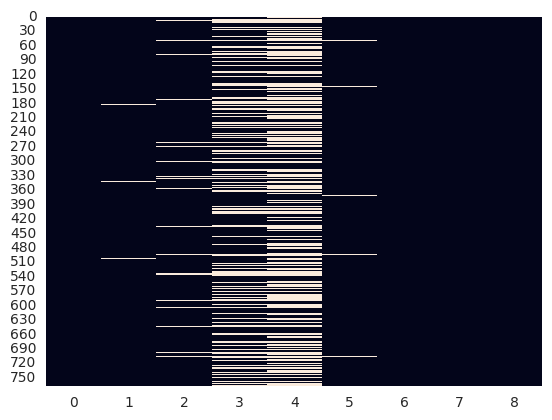

In [11]:
sns.heatmap(diabetes_data.isnull(), cbar=False)
# shows it's mostly insulin missing, and when it's missing,
# it's more likely to be missing in SkinThickness (which is almost never missing by itself)
plt.show()

13. Next, take a closer look at the data types of each column in `diabetes_data`.

    Does the result match what you would expect?

In [12]:
# print data types using .info() method
# diabetes_data.dtypes()
diabetes_data.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   763 non-null    int64
 2   BloodPressure             733 non-null    int64
 3   SkinThickness             541 non-null    int64
 4   Insulin                   394 non-null    int64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    object
dtypes: float64(2), int64(6), object(1)
memory usage: 52.4+ KB


14. To figure out why the `Outcome` column is of type `object` (string) instead of type `int64`, print out the unique values in the `Outcome` column.

In [13]:
# print unique values of Outcome column
diabetes_data.Outcome.unique()

array(['1', '0', 'O'], dtype=object)

15. How might you resolve this issue?

**Your response to question 15**:

In [14]:
diabetes_data["Outcome"] = diabetes_data.Outcome.apply(lambda x: "0" if x == "O" else x)
diabetes_data.Outcome.unique()

array(['1', '0'], dtype=object)

## Next Steps:

16. Congratulations! In this project, you saw how EDA can help with the initial data inspection and cleaning process. This is an important step as it helps to keep your datasets clean and reliable.

    Here are some ways you might extend this project if you'd like:
    - Use `.value_counts()` to more fully explore the values in each column.
    - Investigate other outliers in the data that may be easily overlooked.
    - Instead of changing the `0` values in the five columns to `NaN`, try replacing the values with the median or mean of each column.

In [15]:
counts = diabetes_data.value_counts().reset_index(name="count")
counts[counts["count"] == 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,count
0,0,74,52,10,36,27.8,0.269,22,0,1
1,0,78,88,29,40,36.9,0.434,21,0,1
2,0,84,64,22,66,35.8,0.545,21,0,1
3,0,84,82,31,125,38.2,0.233,23,0,1
4,0,91,68,32,210,39.9,0.381,25,0,1
...,...,...,...,...,...,...,...,...,...,...
387,13,152,90,33,29,26.8,0.731,43,1,1
388,13,153,88,37,140,40.6,1.174,39,0,1
389,14,100,78,25,184,36.6,0.412,46,1,1
390,15,136,70,32,110,37.1,0.153,43,1,1


In [16]:
for col in columns_to_replace:
    col_mean = diabetes_data[col].mean()
    diabetes_data[col] = diabetes_data[col].replace(np.nan, col_mean)

diabetes_data[diabetes_data.isnull().any(axis=1)]  # only print rows with missing data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
